# **Task 1: Stock Price Prediction **

## Importing Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
import pandas_datareader as web
import os
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('C:\\Users\\LENOVO\\OneDrive\\Documents\\TSLA.csv')

In [3]:
os.getcwd()

'C:\\Users\\LENOVO'

In [4]:
os.chdir("C:\\Users\\LENOVO\\OneDrive\\Documents")

In [5]:
df = pd.read_csv('TSLA.csv')

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-15,19.000668,19.130667,18.700001,18.945333,18.945333,142788000
1,2018-05-16,18.922001,19.254000,18.770666,19.098667,19.098667,85110000
2,2018-05-17,19.059999,19.279333,18.931334,18.969334,18.969334,66309000
3,2018-05-18,18.976667,18.976667,18.266666,18.454666,18.454666,108778500
4,2018-05-21,18.755333,19.432667,18.753332,18.966000,18.966000,137739000
...,...,...,...,...,...,...,...
1253,2023-05-08,173.720001,173.800003,169.190002,171.789993,171.789993,112249400
1254,2023-05-09,168.949997,169.820007,166.559998,169.149994,169.149994,88965000
1255,2023-05-10,172.550003,174.429993,166.679993,168.539993,168.539993,119840700
1256,2023-05-11,168.699997,173.570007,166.789993,172.080002,172.080002,103889900


## Visualize the Closing Price

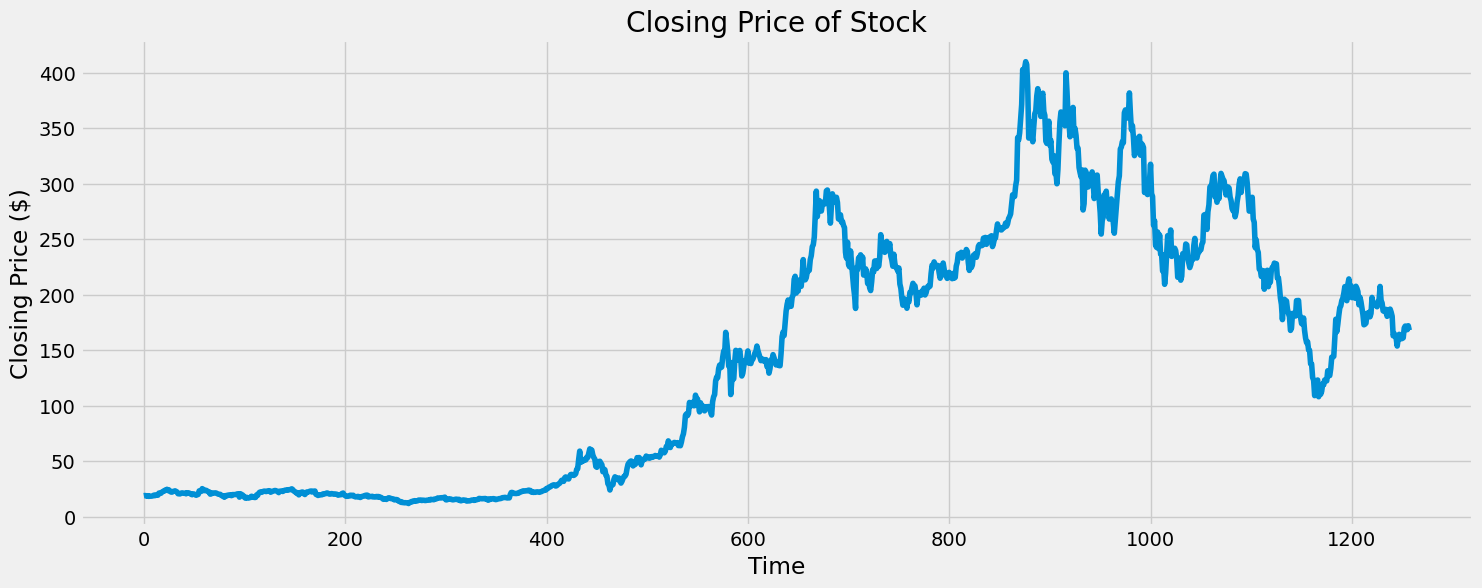

In [7]:
plt.figure(figsize=(16,6))
plt.title('Closing Price of Stock')
plt.plot(df['Close'])
plt.xlabel('Time')
plt.ylabel('Closing Price ($)')
plt.show()


## Create a new dataframe with only Close Column  

In [8]:
data = df.filter(['Close'])

## Convert the dataframe to numpy array

In [9]:
dataset = data.values

## Train 80 percent of number of rows

In [10]:
training_data_len = int(np.ceil( len(dataset) *0.8 ))

training_data_len

1007

## Scale the data

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard Deviation of processed data: ",scaled_data.std())

MEAN of processed data:  0.0
Standard Deviation of processed data:  1.0


## Split the data into x_train and y_train

In [12]:
train_data = scaled_data[0:int(training_data_len), :]

In [13]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        

## Convert the x_train and y_train to numpy arrays

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

## Reshape the data - x_train

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(947, 60, 1)


## Build LSTM Model

In [16]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(25))
model.add(Dense(1))


## Compile the model

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 127,551
Trainable params: 127,551
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [18]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
30/30 [==============================] - 25s 179ms/step - loss: 0.1214
Epoch 2/10
30/30 [==============================] - 5s 160ms/step - loss: 0.0183
Epoch 3/10
30/30 [==============================] - 5s 154ms/step - loss: 0.0154
Epoch 4/10
30/30 [==============================] - 4s 146ms/step - loss: 0.0154
Epoch 5/10
30/30 [==============================] - 5s 151ms/step - loss: 0.0138
Epoch 6/10
30/30 [==============================] - 4s 147ms/step - loss: 0.0113
Epoch 7/10
30/30 [==============================] - 5s 166ms/step - loss: 0.0107
Epoch 8/10
30/30 [==============================] - 5s 160ms/step - loss: 0.0120
Epoch 9/10
30/30 [==============================] - 4s 130ms/step - loss: 0.0091
Epoch 10/10
30/30 [==============================] - 5s 153ms/step - loss: 0.0085


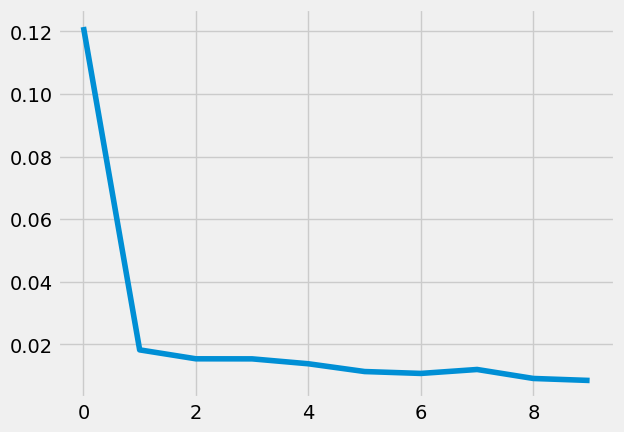

In [19]:
plt.plot(history.history['loss'])

## Create the data - x_test and y_test

In [20]:
test_data = scaled_data[training_data_len - 60: , :]

In [21]:
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

## Convert the data to a numpy array

In [22]:
x_test = np.array(x_test)

## Reshape the data - x_test

In [23]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

## Evaluate the model 

In [24]:
train_loss = model.evaluate(x_train, y_train, verbose=0) 
train_loss = model.evaluate(x_test, y_test, verbose=0) 
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {train_loss:.4f}")

Train Loss: 47550.5977
Test Loss: 47550.5977


## Price Value Prediction

In [25]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 4s 58ms/step


## Calculate RMSE 

In [26]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

12.016207234461927

## Plot the data

In [27]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

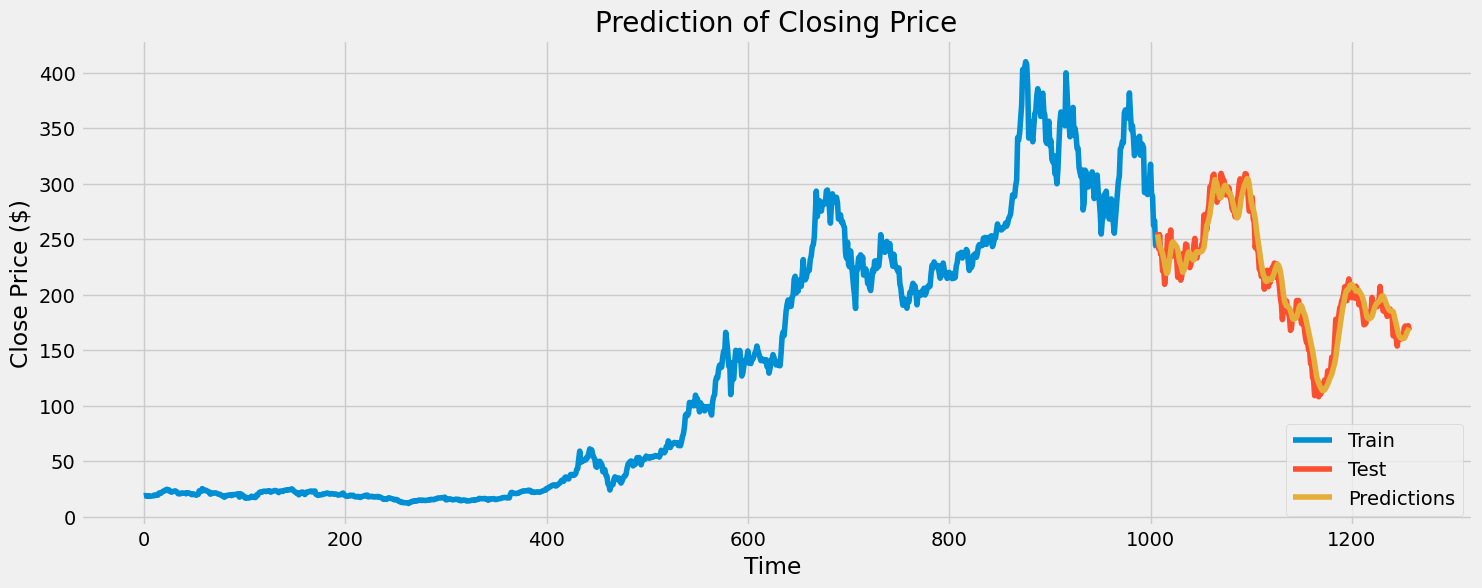

In [28]:
plt.figure(figsize=(16,6))
plt.title('Prediction of Closing Price')
plt.xlabel('Time ')
plt.ylabel('Close Price ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

## Show the valid and predicted prices

In [29]:
valid

,Close,Predictions
1007,256.529999,254.450226
1008,241.456665,249.151672
1009,253.869995,243.889145
1010,236.603333,242.330399
1011,236.473328,239.477356
...,...,...
1253,171.789993,162.366913
1254,169.149994,164.703659
1255,168.539993,166.800720
1256,172.080002,168.441315
